In [1]:
# API LINK RETRIEVED
# https://dev.meteostat.net/api/

In [33]:
# required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import plotly.express as px 
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf


2022-11-10 13:31:29.646626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

querystring = {"station":"10637","start":"2019-01-01","end":"2020-01-31"}

headers = {
	"X-RapidAPI-Key": "98fed68136msh49d44b591f2ab42p1a038ajsn11815f5da95b",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring) #, rapidapi-key == "98fed68136msh49d44b591f2ab42p1a038")


In [4]:
#print(response.text)

In [5]:
var = response.text

In [6]:
import json
json_data = json.loads(var)
#print(json_data)

In [7]:
#import pandas as pd
#df = pd.read_json()
#df.to_csv("data.csv")

In [8]:
# importing meteostate library and dependencies
from meteostat import Point, Daily
from datetime import datetime
import matplotlib.pyplot as plt

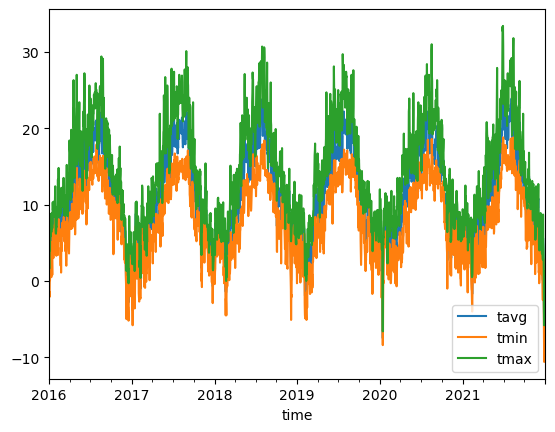

In [9]:
# Set time period
start = datetime(2016, 1, 1)
end = datetime(2021, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
vancouver_data = Daily(vancouver, start, end)
vancouver_data = vancouver_data.fetch()

# Plot line chart including average, minimum and maximum temperature
vancouver_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [10]:
vancouver_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-01-01,0.5,-1.9,2.8,0.0,0.0,NaN,7.4,0.0,1030.3,NaN
2016-01-02,0.1,-1.4,1.6,0.0,0.0,NaN,8.0,0.0,1023.6,NaN
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5,NaN
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4,NaN
2016-01-05,2.1,0.1,4.0,6.9,0.0,NaN,8.0,154.8,1003.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-8.2,-10.6,-5.8,0.0,10.0,90.0,4.0,NaN,1011.9,NaN
2021-12-28,-4.7,-8.4,-1.1,0.0,10.0,345.0,2.9,NaN,1010.5,NaN
2021-12-29,-4.3,-6.2,-2.4,0.0,0.0,54.0,4.8,NaN,1013.7,NaN


In [11]:
# datatypes
vancouver_data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', length=2192, freq='D')

In [12]:
vancouver_data.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [13]:
# missing data values

print(vancouver_data.isna().sum())

tavg       0
tmin       0
tmax       0
prcp       0
snow      48
wdir     334
wspd      15
wpgt     474
pres      46
tsun    2192
dtype: int64


### the tsun variable that indicates daily sunshine total in minutes is missing data entirely deciding to drop this 

In [14]:
# turn into dataframe
vc_data = pd.DataFrame(vancouver_data)

# drop tsun column entirely 

vc_data = vc_data.drop(['tsun'], axis=1)
vc_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
time,,,,,,,,,
2016-01-01,0.5,-1.9,2.8,0.0,0.0,NaN,7.4,0.0,1030.3
2016-01-02,0.1,-1.4,1.6,0.0,0.0,NaN,8.0,0.0,1023.6
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4
2016-01-05,2.1,0.1,4.0,6.9,0.0,NaN,8.0,154.8,1003.1
...,...,...,...,...,...,...,...,...,...
2021-12-27,-8.2,-10.6,-5.8,0.0,10.0,90.0,4.0,NaN,1011.9
2021-12-28,-4.7,-8.4,-1.1,0.0,10.0,345.0,2.9,NaN,1010.5
2021-12-29,-4.3,-6.2,-2.4,0.0,0.0,54.0,4.8,NaN,1013.7


In [20]:
vc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2016-01-01 to 2021-12-31
Freq: D
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    2192 non-null   float64
 1   tmin    2192 non-null   float64
 2   tmax    2192 non-null   float64
 3   prcp    2192 non-null   float64
 4   snow    2144 non-null   float64
 5   wdir    1858 non-null   float64
 6   wspd    2177 non-null   float64
 7   wpgt    1718 non-null   float64
 8   pres    2146 non-null   float64
dtypes: float64(9)
memory usage: 171.2 KB


In [21]:
# summarize data statistics
vc_data.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
count,2192.000000,2192.000000,2192.000000,2192.000000,2144.000000,1858.000000,2177.000000,1718.000000,2146.000000
mean,11.218157,8.030338,14.389599,4.335538,0.541045,163.182454,12.447083,81.703376,1016.827586
std,5.876002,5.186808,6.824576,8.944126,8.509345,101.366148,5.374522,62.692384,6.824465
min,-8.200000,-10.600000,-6.600000,0.000000,0.000000,0.000000,1.700000,0.000000,987.700000
25%,6.600000,4.200000,8.700000,0.000000,0.000000,86.000000,8.600000,33.000000,1013.100000
50%,10.700000,7.800000,13.600000,0.000000,0.000000,122.000000,11.800000,56.500000,1017.000000
75%,16.300000,12.500000,19.900000,4.800000,0.000000,276.000000,15.500000,133.200000,1020.900000
max,25.600000,18.800000,33.400000,77.500000,200.000000,359.000000,43.100000,327.600000,1038.600000


In [24]:
# checking missing values
vc_data.isnull().sum() # sum of missing values for each variable

tavg      0
tmin      0
tmax      0
prcp      0
snow     48
wdir    334
wspd     15
wpgt    474
pres     46
dtype: int64

In [67]:
# percentage of data that is missing 
len(vc_data.isnull())/len(vc_data)

1.0

In [15]:
# dropping all nan rows

new_vc_data = vc_data.dropna()
new_vc_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
time,,,,,,,,,
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4
2016-01-12,6.8,5.1,8.4,18.4,0.0,88.0,14.9,118.8,1011.2
2016-01-14,5.5,2.0,8.9,0.2,0.0,70.0,11.0,118.8,1013.7
2016-01-16,7.3,5.8,8.7,13.4,0.0,89.0,18.6,133.2,1007.0
...,...,...,...,...,...,...,...,...,...
2021-12-22,5.6,2.5,8.7,19.4,0.0,70.0,13.3,46.0,1000.2
2021-12-23,4.1,2.9,5.1,3.4,0.0,297.0,10.3,46.0,994.1
2021-12-24,2.3,0.5,4.2,12.8,0.0,30.0,9.7,39.0,991.1


## Exploratory Data Analysis

### Correlation Analysis

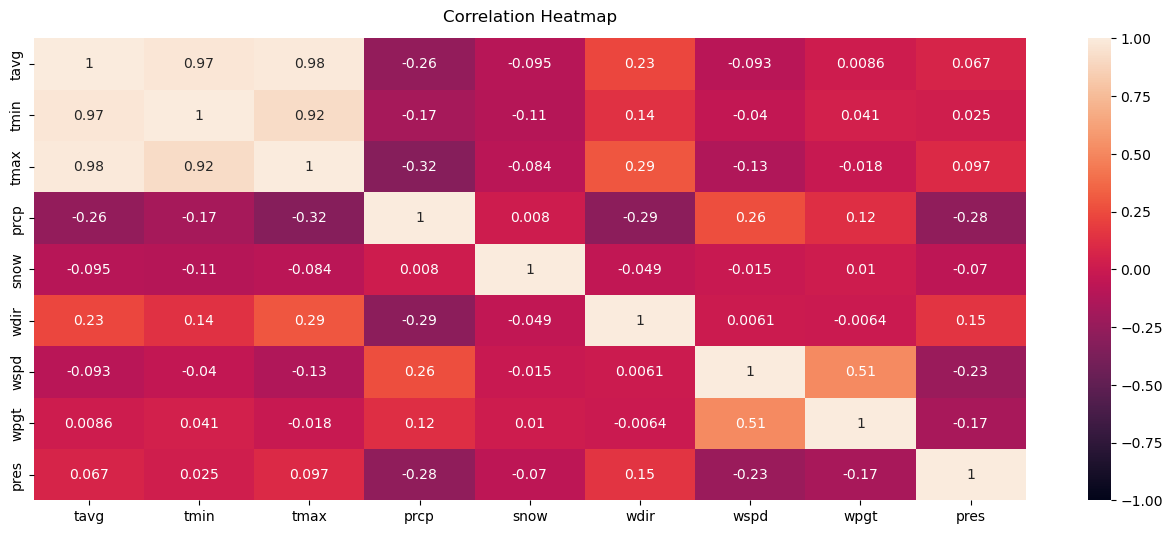

In [28]:
# Correlation Analysis 
# How are Independent Features and Output features are related
# if highly negative or positvely correlated, then model performance will be high
# if there are high correlation in independent features, then can remove one - this could cause
# multicollinearity and check for multiple identity

# the temperature measurements are all highly correlated. Deciding to only retain
# tavg since it's a statistical discriptor of the measure 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(new_vc_data.corr(), vmin=-1, vmax=1, annot=True);

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

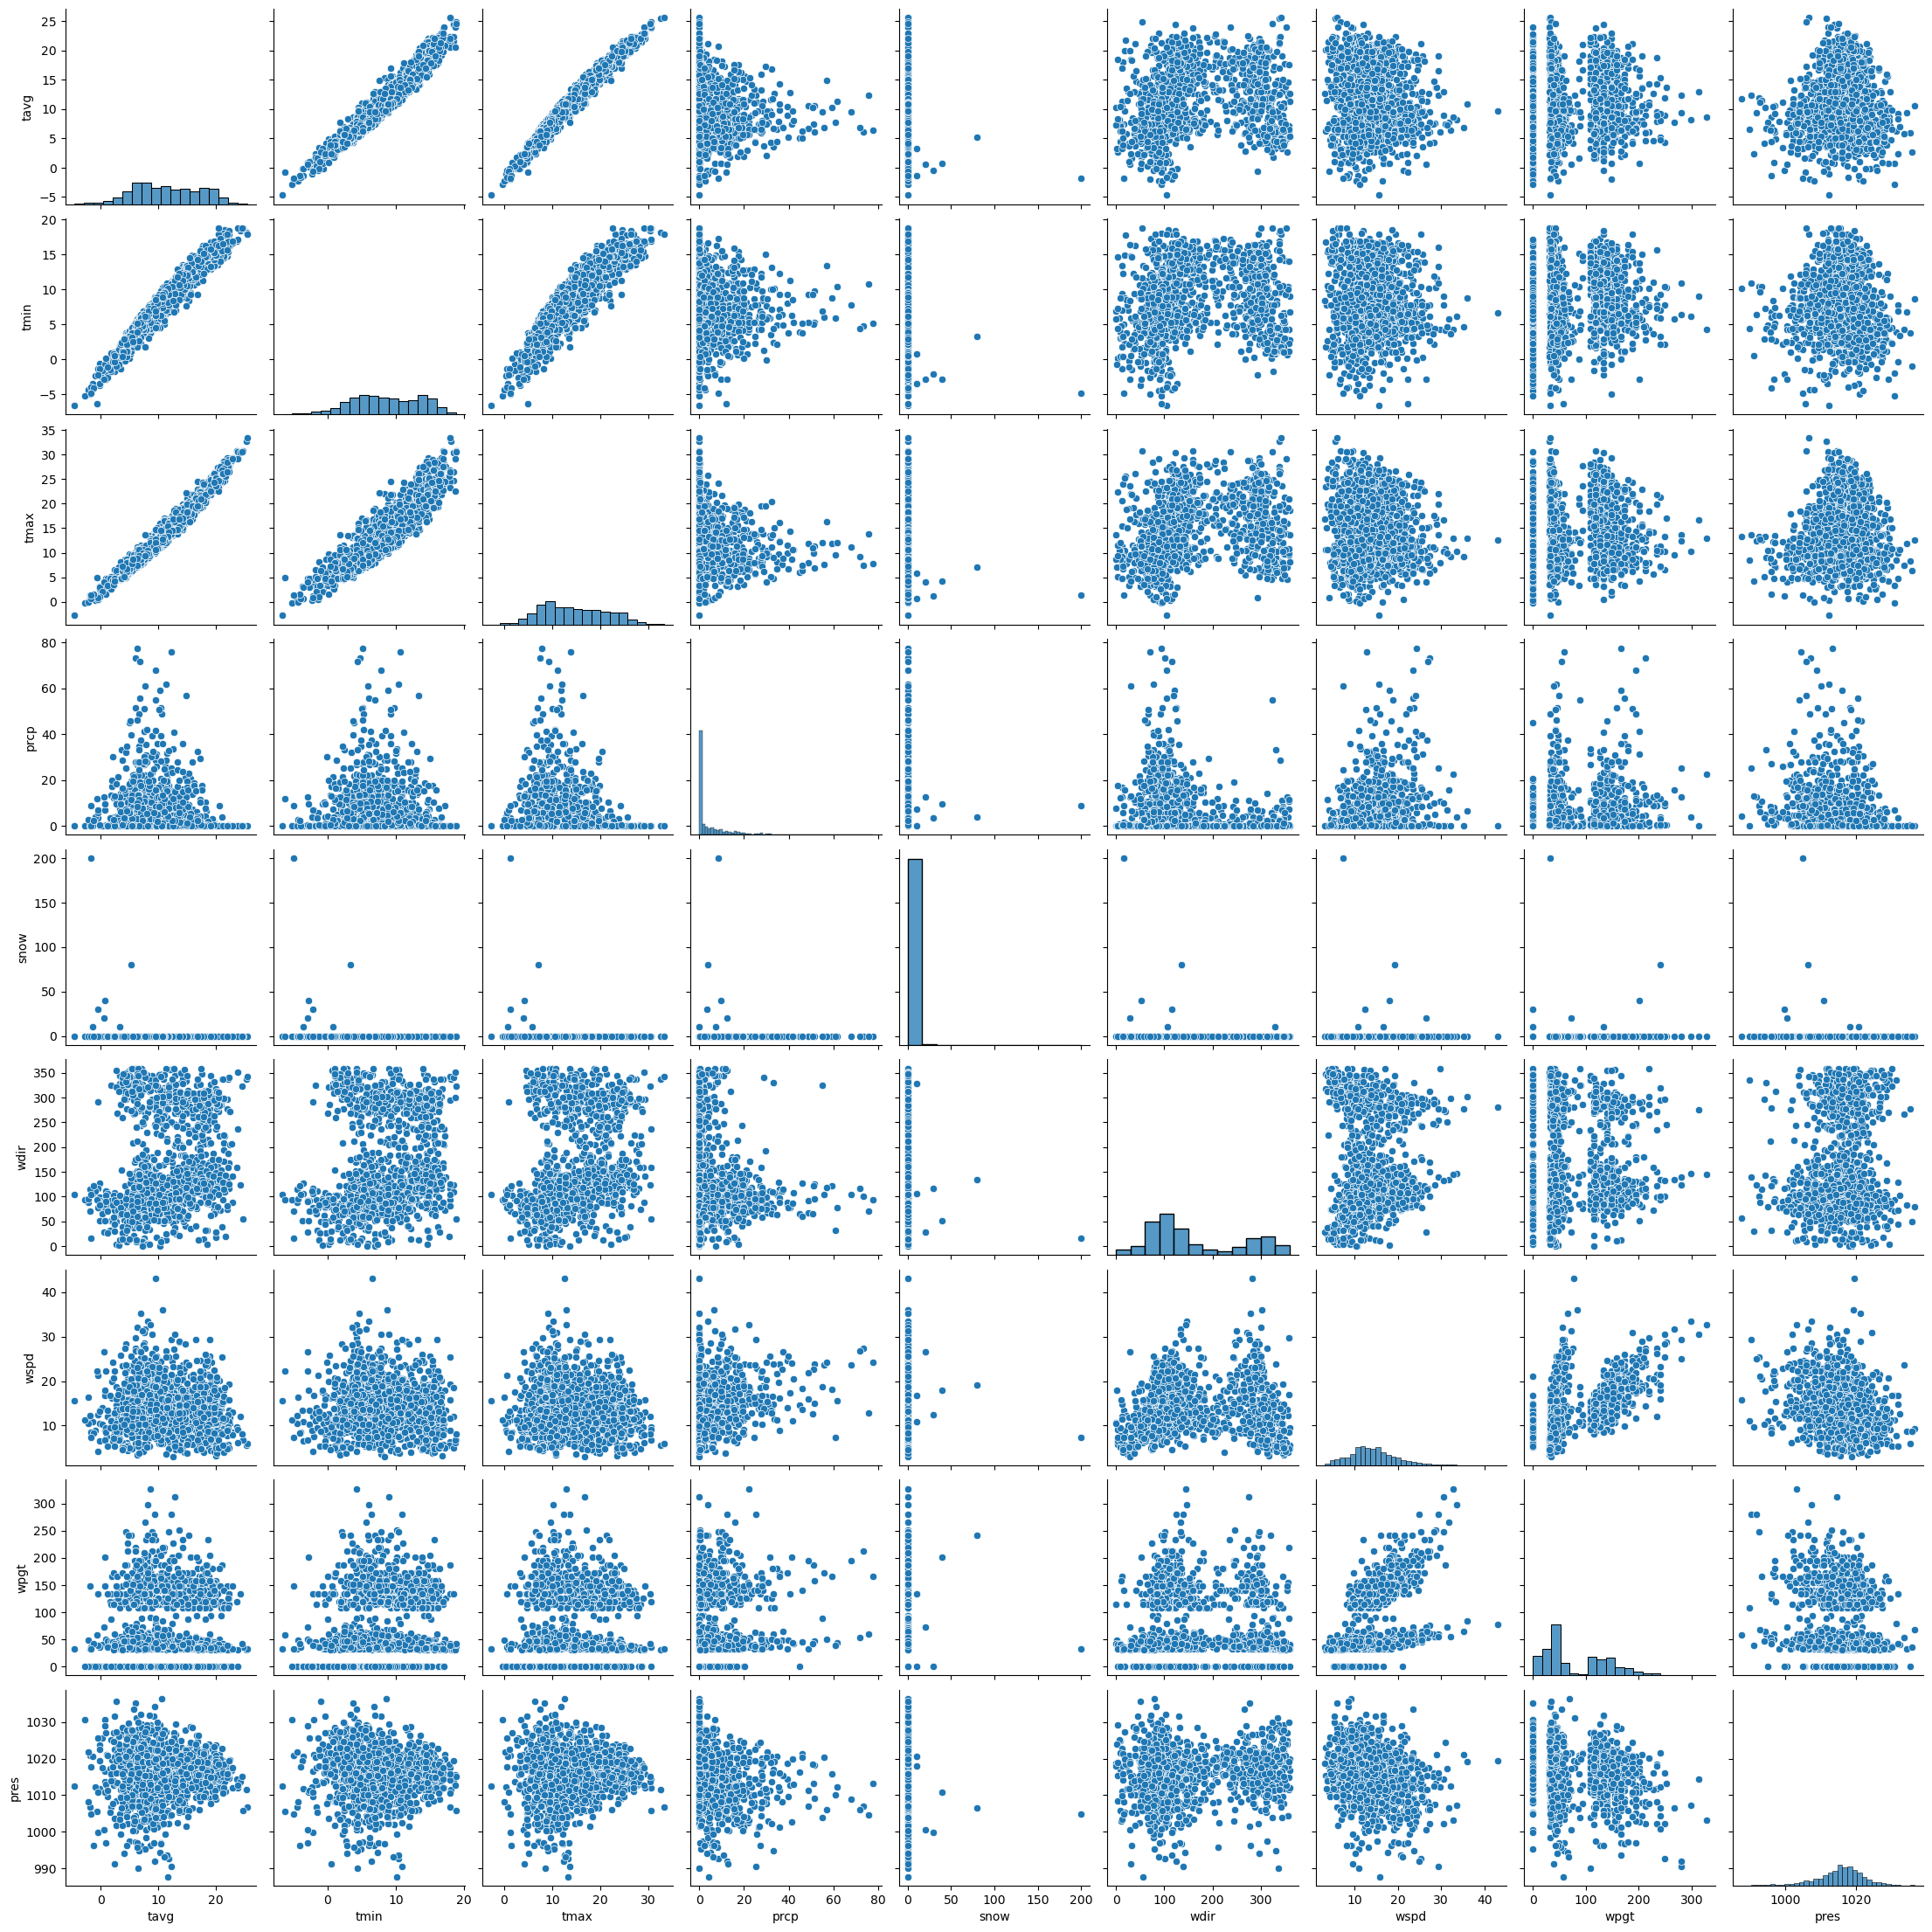

In [29]:
# pairplot (How are features related?)

sns.pairplot(new_vc_data)

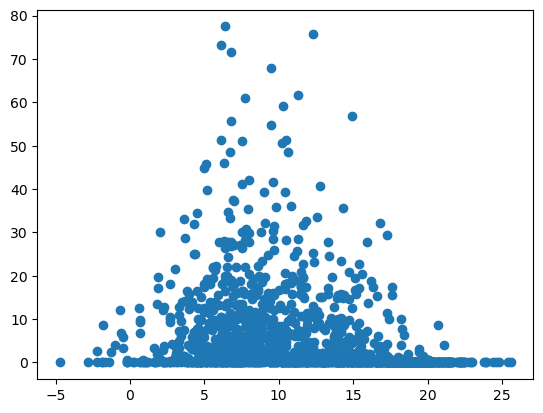

In [30]:
plt.scatter(new_vc_data['tavg'], new_vc_data['prcp'])

array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'prcp'}>,
        <AxesSubplot:title={'center':'snow'}>,
        <AxesSubplot:title={'center':'wdir'}>],
       [<AxesSubplot:title={'center':'wspd'}>,
        <AxesSubplot:title={'center':'wpgt'}>,
        <AxesSubplot:title={'center':'pres'}>]], dtype=object)

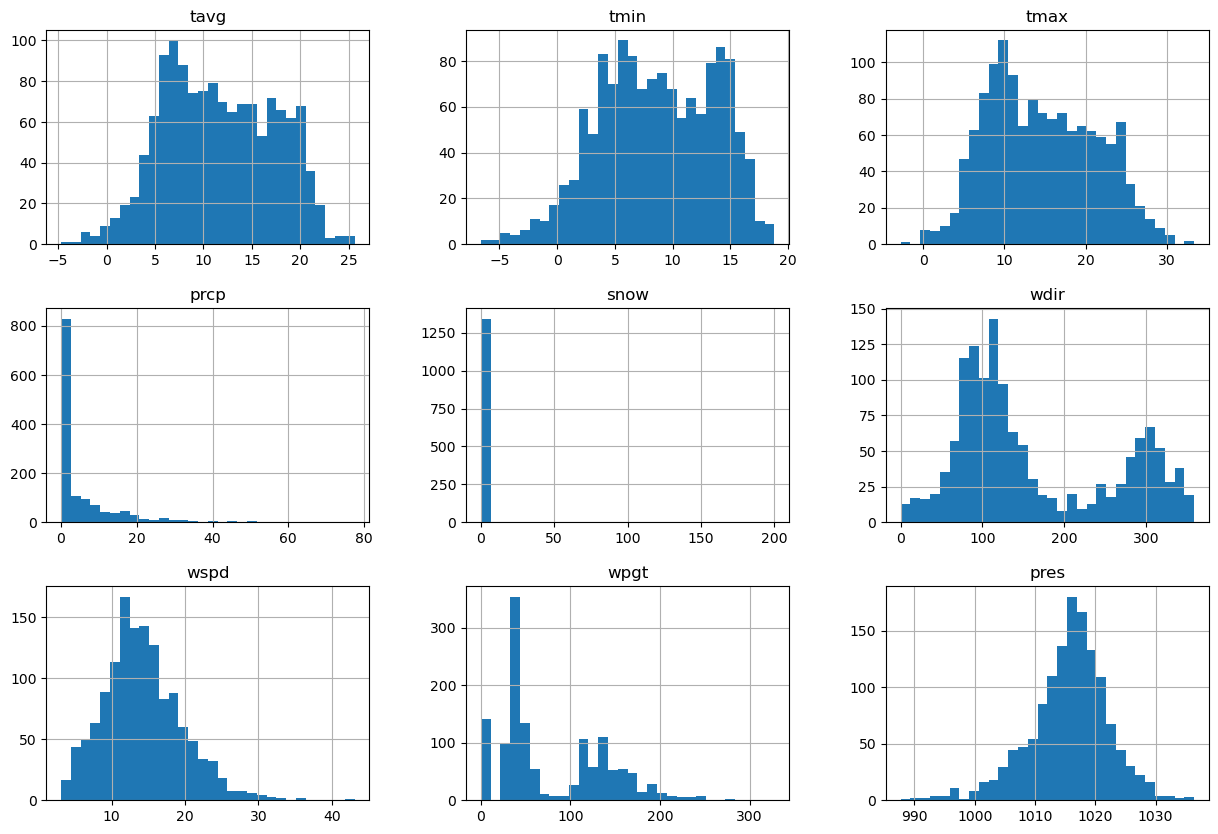

In [16]:
# var histograms 
new_vc_data.hist(bins = 30, figsize=(15,10))

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

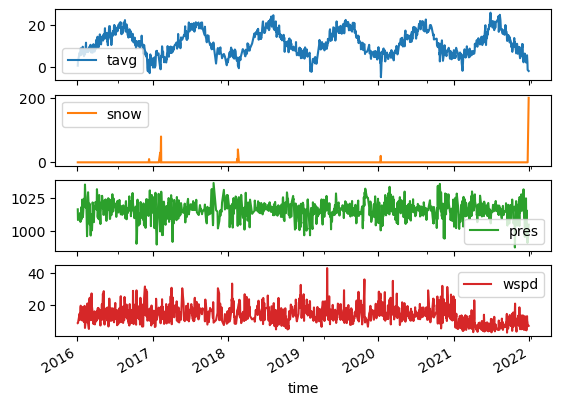

In [38]:
new_vc_data[['tavg', 'snow', 'pres', 'wspd']].plot(subplots=True)

In [52]:
df_input = new_vc_data[['prcp','tavg', 'snow', 'pres', 'wspd']]

In [53]:
df_input.describe()
# notice snow measure outliers 

,prcp,tavg,snow,pres,wspd
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,5.577885,11.617086,0.288462,1015.646967,14.187870
std,10.186524,5.685296,6.046177,6.592709,5.347242
min,0.000000,-4.700000,0.000000,987.700000,3.100000
25%,0.000000,7.100000,0.000000,1012.200000,10.700000
50%,0.400000,11.250000,0.000000,1016.200000,13.600000
75%,7.200000,16.500000,0.000000,1019.700000,17.300000
max,77.500000,25.600000,200.000000,1036.400000,43.100000


In [55]:
# check to see amount of outliers
df_input.query('prcp > 20')


,prcp,tavg,snow,pres,wspd
time,,,,,
2016-01-21,29.9,8.0,0.0,1009.1,16.6
2016-01-27,28.4,9.6,0.0,1017.9,19.0
2016-02-12,20.9,11.5,0.0,1017.7,16.0
2016-02-13,22.1,7.7,0.0,1019.9,16.7
2016-05-28,59.1,10.3,0.0,1015.9,18.1
...,...,...,...,...,...
2021-11-25,46.0,6.3,0.0,1020.5,13.7
2021-11-27,28.2,7.7,0.0,1015.4,10.3
2021-11-28,36.0,10.8,0.0,1016.2,9.0


In [56]:
# need to scale the data so that the gradients can converge faster
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [57]:
data_scaled

array([[0.        , 0.17821782, 0.        , 0.59137577, 0.1475    ],
       [0.00387097, 0.24422442, 0.        , 0.42505133, 0.15      ],
       [0.23741935, 0.37953795, 0.        , 0.4825462 , 0.295     ],
       ...,
       [0.16516129, 0.2310231 , 0.        , 0.0698152 , 0.165     ],
       [0.03096774, 0.11221122, 0.        , 0.1724846 , 0.13      ],
       [0.11096774, 0.09570957, 1.        , 0.35318275, 0.105     ]])

In [59]:
features = data_scaled
target = data_scaled[:,0] #first column, precipitation

In [60]:
TimeseriesGenerator(features, target, length=7, sampling_rate=1, batch_size=1)[0]

# took first 7th training instances, took 7 time periods of data
# we feed that into training
# and predicts the precipitation of the 8th training instance 

(array([[[0.        , 0.17821782, 0.        , 0.59137577, 0.1475    ],
         [0.00387097, 0.24422442, 0.        , 0.42505133, 0.15      ],
         [0.23741935, 0.37953795, 0.        , 0.4825462 , 0.295     ],
         [0.00258065, 0.33663366, 0.        , 0.5338809 , 0.1975    ],
         [0.17290323, 0.3960396 , 0.        , 0.3963039 , 0.3875    ],
         [0.11354839, 0.44554455, 0.        , 0.41683778, 0.4175    ],
         [0.08387097, 0.42244224, 0.        , 0.50718686, 0.415     ]]]),
 array([0.02193548]))

In [61]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [62]:
x_train.shape #80% of data

(1081, 5)

In [63]:
x_test.shape #20% of data

(271, 5)

In [72]:
# window length
win_length = 150
batch_size = 30
num_features = 5
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [73]:
train_generator[0]

(array([[[0.        , 0.17821782, 0.        , 0.59137577, 0.1475    ],
         [0.00387097, 0.24422442, 0.        , 0.42505133, 0.15      ],
         [0.23741935, 0.37953795, 0.        , 0.4825462 , 0.295     ],
         ...,
         [0.        , 0.84488449, 0.        , 0.59958932, 0.1775    ],
         [0.        , 0.80528053, 0.        , 0.64271047, 0.3025    ],
         [0.        , 0.83168317, 0.        , 0.64681725, 0.3       ]],
 
        [[0.00387097, 0.24422442, 0.        , 0.42505133, 0.15      ],
         [0.23741935, 0.37953795, 0.        , 0.4825462 , 0.295     ],
         [0.00258065, 0.33663366, 0.        , 0.5338809 , 0.1975    ],
         ...,
         [0.        , 0.80528053, 0.        , 0.64271047, 0.3025    ],
         [0.        , 0.83168317, 0.        , 0.64681725, 0.3       ],
         [0.        , 0.83828383, 0.        , 0.63244353, 0.425     ]],
 
        [[0.23741935, 0.37953795, 0.        , 0.4825462 , 0.295     ],
         [0.00258065, 0.33663366, 0.       

In [74]:
# Building out the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(50, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(25, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



2022-11-10 14:35:05.653626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           11200     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 50)           0         
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0

## Predicting Missing Values with ML
https://python.plainenglish.io/predict-missing-dataframe-values-with-an-ml-algorithm-717cd872f1a8